In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

EDA

In [2]:
df = pd.read_csv('Dataset.csv')

print(df.head())

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0       50001      1     4.0         Mobile Phone         3   
1       50002      1     NaN                Phone         1   
2       50003      1     NaN                Phone         1   
3       50004      1     0.0                Phone         3   
4       50005      1     0.0                Phone         1   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

   SatisfactionScore MaritalStatus  Complain  OrderCount  DaySinceLastOrder  
0                  2        Single         1         1.0                5.0  
1       

In [3]:
df.shape

(5630, 14)

In [4]:
df.dtypes

CustomerID                    int64
Churn                         int64
Tenure                      float64
PreferredLoginDevice         object
CityTier                      int64
PreferredPaymentMode         object
Gender                       object
HourSpendOnApp              float64
NumberOfDeviceRegistered      int64
SatisfactionScore             int64
MaritalStatus                object
Complain                      int64
OrderCount                  float64
DaySinceLastOrder           float64
dtype: object

In [5]:
df.isna().sum()

CustomerID                    0
Churn                         0
Tenure                      264
PreferredLoginDevice          0
CityTier                      0
PreferredPaymentMode          0
Gender                        0
HourSpendOnApp              255
NumberOfDeviceRegistered      0
SatisfactionScore             0
MaritalStatus                 0
Complain                      0
OrderCount                  258
DaySinceLastOrder           307
dtype: int64

In [6]:
df.drop(columns="CustomerID", inplace=True)

In [7]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['churn', 'tenure', 'preferredlogindevice', 'citytier',
       'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'satisfactionscore', 'maritalstatus',
       'complain', 'ordercount', 'daysincelastorder'],
      dtype='object')

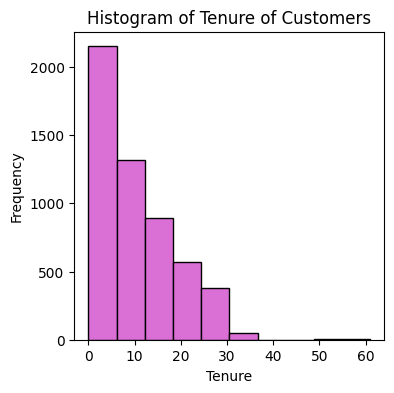

In [8]:
plt.figure(figsize=(4, 4))  
plt.hist(df['tenure'], color='orchid', edgecolor='black')
plt.title('Histogram of Tenure of Customers')  
plt.xlabel('Tenure')  
plt.ylabel('Frequency')   
plt.show()

Text(0.5, 1.0, 'Plot of Gender')

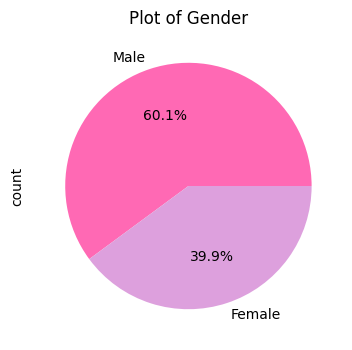

In [9]:
colors = ['hotpink','plum']
gender = df['gender'].value_counts()
gender.plot(kind = 'pie', figsize = (4,4), colors=colors, autopct='%1.1f%%')
plt.title('Plot of Gender')

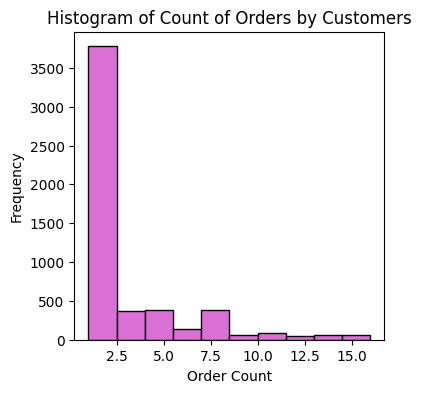

In [10]:
plt.figure(figsize=(4, 4))  
plt.hist(df['ordercount'], color='orchid', edgecolor='black')
plt.title('Histogram of Count of Orders by Customers')  
plt.xlabel('Order Count')  
plt.ylabel('Frequency')   
plt.show()

Text(0.5, 1.0, 'Plot of Number of Complaints')

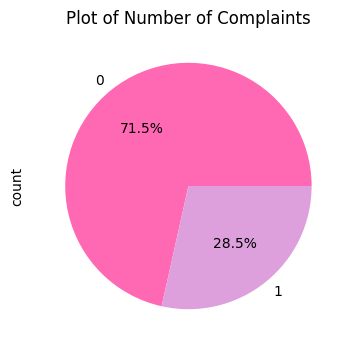

In [11]:
colors = ['hotpink','plum']
gender = df['complain'].value_counts()
gender.plot(kind = 'pie', figsize = (4,4), colors=colors, autopct='%1.1f%%')
plt.title('Plot of Number of Complaints')

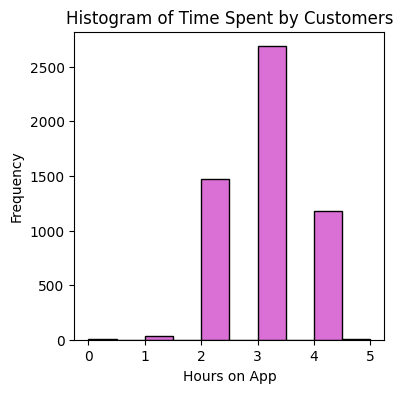

In [12]:
plt.figure(figsize=(4, 4))  
plt.hist(df['hourspendonapp'], color='orchid', edgecolor='black')
plt.title('Histogram of Time Spent by Customers')  
plt.xlabel('Hours on App')  
plt.ylabel('Frequency')   
plt.show()

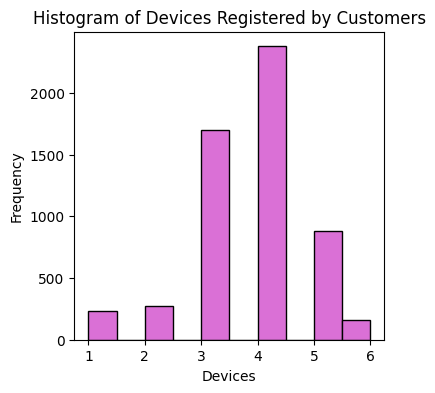

In [13]:
plt.figure(figsize=(4, 4))  
plt.hist(df['numberofdeviceregistered'], color='orchid', edgecolor='black')
plt.title('Histogram of Devices Registered by Customers')  
plt.xlabel('Devices')  
plt.ylabel('Frequency')   
plt.show()

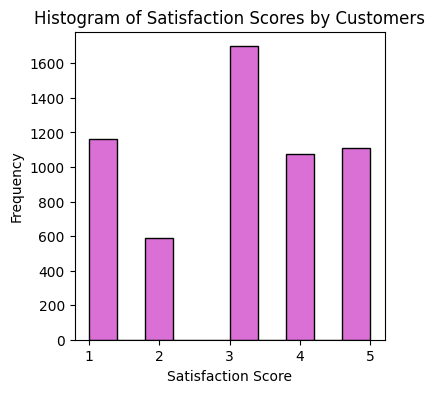

In [14]:
plt.figure(figsize=(4, 4))  
plt.hist(df['satisfactionscore'], color='orchid', edgecolor='black')
plt.title('Histogram of Satisfaction Scores by Customers')  
plt.xlabel('Satisfaction Score')  
plt.ylabel('Frequency')   
plt.show()

Text(0.5, 1.0, 'Plot of Churn')

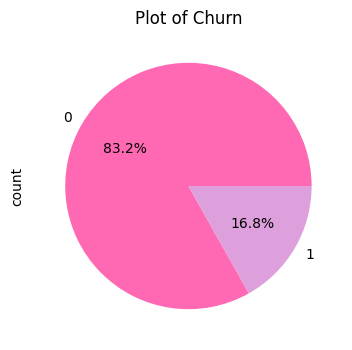

In [15]:
colors = ['hotpink','plum']
gender = df['churn'].value_counts()
gender.plot(kind = 'pie', figsize = (4,4), colors=colors, autopct='%1.1f%%')
plt.title('Plot of Churn')

Handling Missing Values

In [ ]:
from sklearn.impute import SimpleImputer 
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer  
from sklearn.ensemble import RandomForestRegressor  
import pandas as pd  

def fill_missing_values(df, random_state=None):
    # Step 1: Identify numeric and categorical columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()  # Include both string and category data

    # Step 2: Impute numeric columns
    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    # Step 3: Handle categorical columns
    for col in categorical_columns:
        if df[col].dtype == 'object':
            # Convert categorical column to one-hot encoded representation
            encoded_cols = pd.get_dummies(df[col], prefix=col)
            # Concatenate one-hot encoded columns
            df = pd.concat([df.drop(col, axis=1), encoded_cols], axis=1)

    # Step 4: Random Forest Iterative Imputer for the entire DataFrame
    rf_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=random_state))
    df = pd.DataFrame(rf_imputer.fit_transform(df), columns=df.columns)

    return df

# Call the function to fill missing values
df = fill_missing_values(df, random_state=42)

In [17]:
df.head()

,churn,tenure,citytier,hourspendonapp,numberofdeviceregistered,satisfactionscore,complain,ordercount,daysincelastorder,preferredlogindevice_Computer,...,preferredpaymentmode_Cash on Delivery,preferredpaymentmode_Credit Card,preferredpaymentmode_Debit Card,preferredpaymentmode_E wallet,preferredpaymentmode_UPI,gender_Female,gender_Male,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single
0,1.0,4.000000,3.0,3.000000,3.0,2.0,1.0,1.0,5.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,10.189899,1.0,3.000000,4.0,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,10.189899,1.0,2.000000,4.0,3.0,1.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.000000,3.0,2.000000,4.0,5.0,0.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.000000,1.0,2.931535,3.0,5.0,0.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Model Development

In [20]:
# Split model into training and test set
X = df.drop(columns=["churn"])
Y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
Xtrain_balanced, Ytrain_balanced = smote.fit_resample(X, Y)
print("Balanced Xtrain shape:", Xtrain_balanced.shape)
print("Balanced Ytrain shape:", Ytrain_balanced.shape)

Balanced Xtrain shape: (9364, 23)
Balanced Ytrain shape: (9364,)


In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xtrain_balanced, Ytrain_balanced, random_state=123, test_size=0.2)

In [24]:
Xtrain.shape

(7491, 23)

In [25]:
Xtest.shape

(1873, 23)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtrain

array([[-0.46251069, -0.78614556,  0.07324496, ..., -0.41865649,
        -0.9483208 ,  1.24192242],
       [-0.84181814,  1.35857715,  0.87662655, ..., -0.41865649,
        -0.9483208 ,  1.24192242],
       [-0.20963906, -0.78614556,  0.07324496, ..., -0.41865649,
         1.11827367, -0.83947275],
       ...,
       [-0.84181814,  1.35857715,  0.07324496, ..., -0.41865649,
        -0.9483208 ,  1.24192242],
       [ 1.81333399, -0.78614556,  0.07324496, ..., -0.41865649,
         1.11827367, -0.83947275],
       [-0.84181814, -0.78614556,  1.57472306, ..., -0.41865649,
        -0.9483208 ,  1.24192242]])

In [28]:
Xtest = scaler.transform(Xtest)
Xtest

array([[-0.08320325,  1.35857715,  0.07324496, ..., -0.41865649,
         1.11827367, -0.83947275],
       [-0.95114677, -0.78614556, -0.01564489, ...,  2.61955703,
        -0.9483208 , -0.83947275],
       [-0.33607488, -0.78614556,  0.07324496, ..., -0.41865649,
         1.11827367, -0.83947275],
       ...,
       [-0.84181814, -0.78614556,  0.07324496, ..., -0.41865649,
         1.11827367, -0.83947275],
       [-0.46251069, -0.78614556,  0.07324496, ..., -0.41865649,
         1.11827367, -0.83947275],
       [ 0.16966839,  1.35857715,  0.07324496, ..., -0.41865649,
        -0.9483208 ,  1.24192242]])

Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB 
model_NB = GaussianNB()                       
model_NB.fit(Xtrain, Ytrain)                  
NB_model = model_NB.predict(Xtest)
from sklearn.metrics import accuracy_score
acc_NB = accuracy_score(Ytest, NB_model)
acc_NB

0.7437266417512013

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, NB_model))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       947
         1.0       0.73      0.76      0.75       926

    accuracy                           0.74      1873
   macro avg       0.74      0.74      0.74      1873
weighted avg       0.74      0.74      0.74      1873



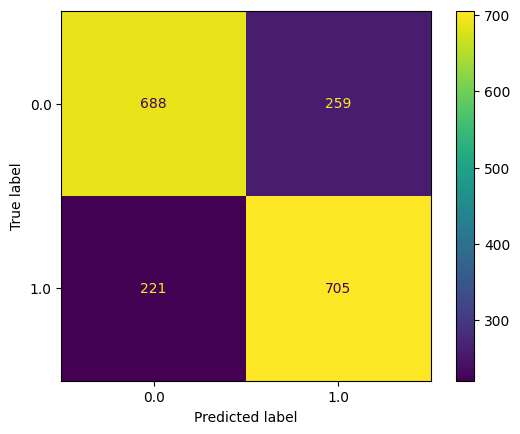

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_NB = confusion_matrix(Ytest, NB_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_NB, display_labels = model_NB.classes_)
disp.plot()

Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier 
model_RF = RandomForestClassifier()                       
model_RF.fit(Xtrain, Ytrain)                  
RF_model = model_RF.predict(Xtest) 
acc_RF = accuracy_score(Ytest, RF_model)
acc_RF

0.9749065670048052

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, RF_model))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       947
         1.0       0.98      0.97      0.97       926

    accuracy                           0.97      1873
   macro avg       0.97      0.97      0.97      1873
weighted avg       0.97      0.97      0.97      1873



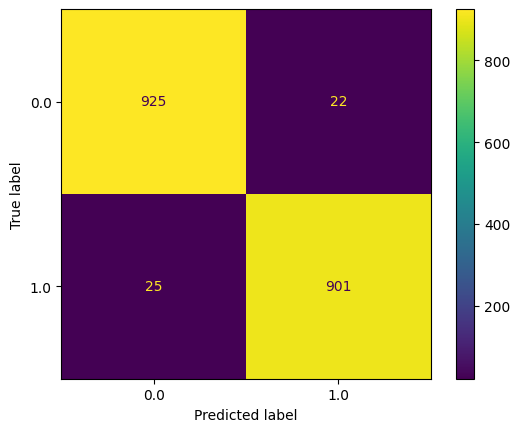

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_RF = confusion_matrix(Ytest, RF_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_RF, display_labels = model_RF.classes_)
disp.plot()

Logistic Regression

In [36]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
model_LR = linear_model.LogisticRegression()
model_LR.fit(Xtrain, Ytrain)
LR_model = model_LR.predict(Xtest)
acc_LR = accuracy_score(Ytest, LR_model)
acc_LR

0.7832354511478911

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, LR_model))

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78       947
         1.0       0.78      0.79      0.78       926

    accuracy                           0.78      1873
   macro avg       0.78      0.78      0.78      1873
weighted avg       0.78      0.78      0.78      1873



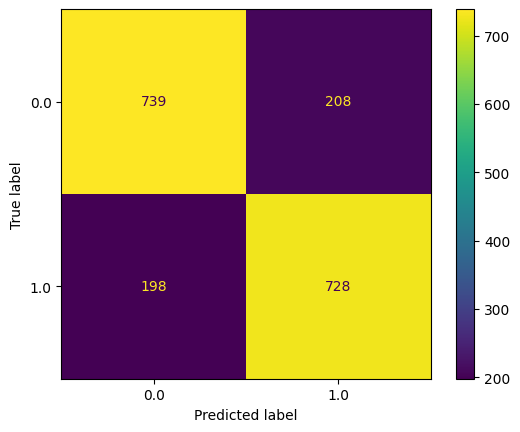

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_LR = confusion_matrix(Ytest, LR_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_LR, display_labels = model_LR.classes_)
disp.plot()

Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(Xtrain, Ytrain)
DT_model = model_DT.predict(Xtest)
acc_DT = accuracy_score(Ytest, DT_model)
acc_DT

0.9636946075814202

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, DT_model))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       947
         1.0       0.95      0.98      0.96       926

    accuracy                           0.96      1873
   macro avg       0.96      0.96      0.96      1873
weighted avg       0.96      0.96      0.96      1873



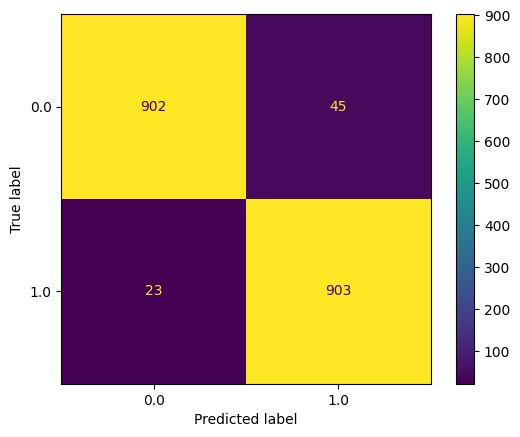

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_DT = confusion_matrix(Ytest, DT_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_DT, display_labels = model_DT.classes_)
disp.plot()

KNN

Text(0, 0.5, 'Error Rate')

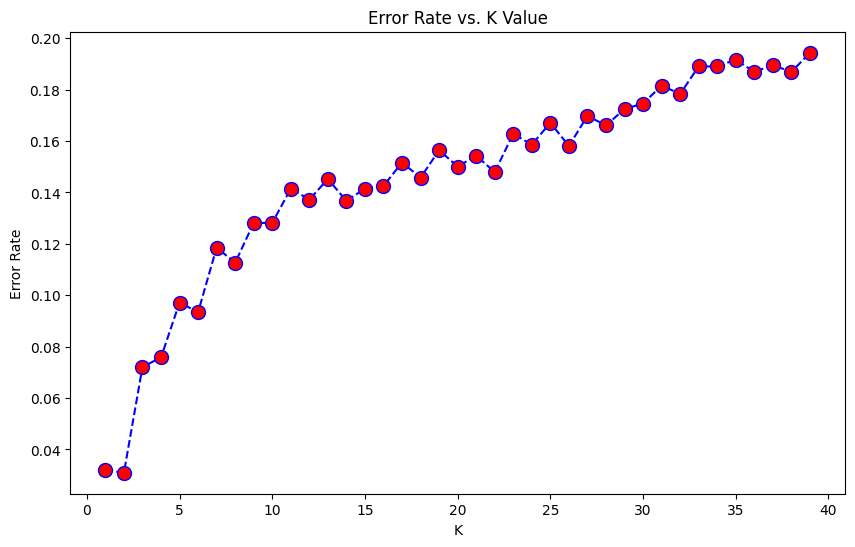

In [42]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtrain,Ytrain)
 pred_i = knn.predict(Xtest)
 error_rate.append(np.mean(pred_i != Ytest))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Maximum accuracy: 0.9690336358782702 at K = 2


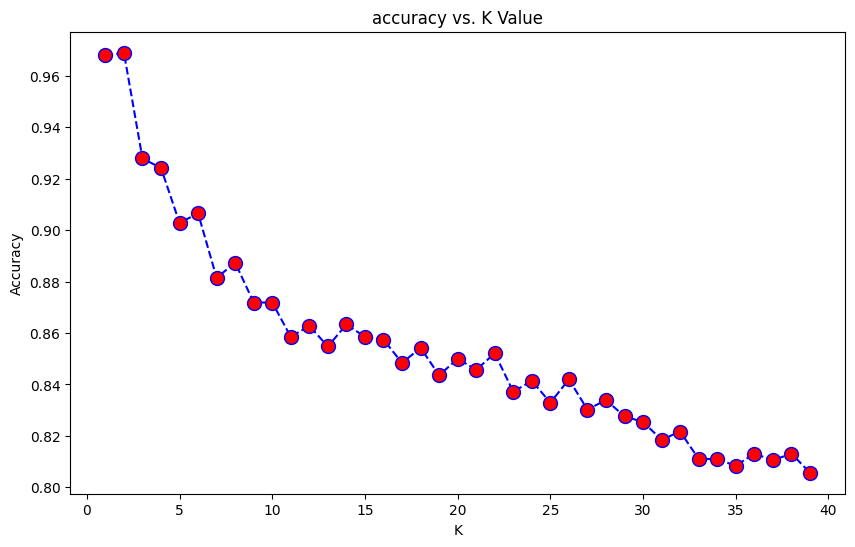

In [43]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(Xtrain,Ytrain)
    yhat = neigh.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
max_accuracy = max(acc)
optimal_k_value = acc.index(max_accuracy) + 1
print("Maximum accuracy:",max_accuracy,"at K =", optimal_k_value)

In [44]:
knn = KNeighborsClassifier(n_neighbors=13)
model_KNN = knn.fit(Xtrain, Ytrain)
KNN_model = knn.predict(Xtest)
acc_KNN = accuracy_score(Ytest, KNN_model)
acc_KNN

0.8547784303256807

In [45]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, KNN_model))

              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84       947
         1.0       0.80      0.94      0.87       926

    accuracy                           0.85      1873
   macro avg       0.87      0.86      0.85      1873
weighted avg       0.87      0.85      0.85      1873



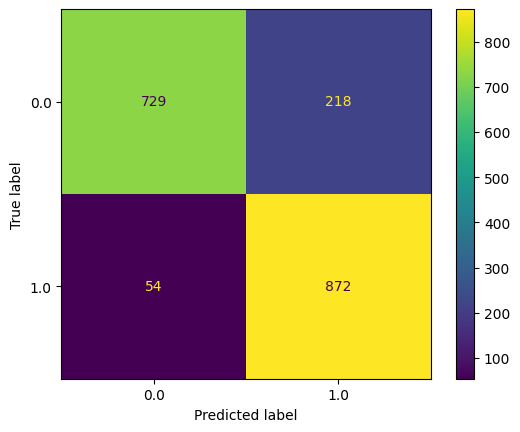

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_KNN = confusion_matrix(Ytest, KNN_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_KNN, display_labels = model_KNN.classes_)
disp.plot()

Evaluation

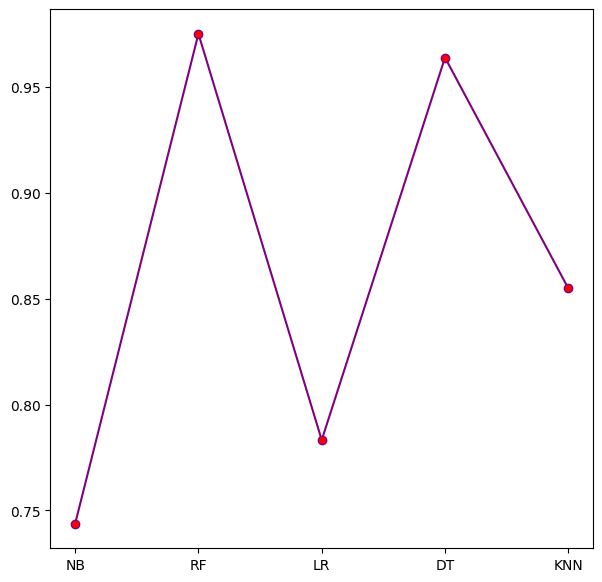

In [47]:
plt.rcParams["figure.figsize"] = [7,7]
acc = [acc_NB, acc_RF, acc_LR, acc_DT, acc_KNN]
models = ['NB', 'RF', 'LR', 'DT', 'KNN']

plt.plot(models,acc, color = 'purple', marker = 'o', markerfacecolor = 'red')
plt.grid(False)
plt.show()

Random Forest is the most Accurate

Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validation Accuracy: 0.9744 ± 0.0064


Hyperparameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9423


Feature Importance

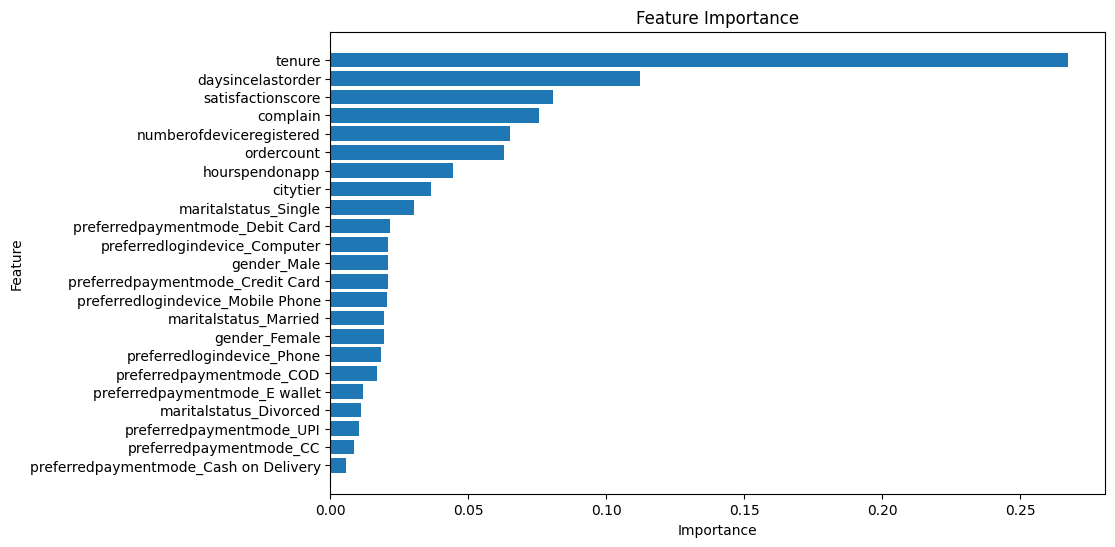

In [50]:

rf_model.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [56]:
X.columns

Index(['tenure', 'citytier', 'hourspendonapp', 'numberofdeviceregistered',
       'satisfactionscore', 'complain', 'ordercount', 'daysincelastorder',
       'preferredlogindevice_Computer', 'preferredlogindevice_Mobile Phone',
       'preferredlogindevice_Phone', 'preferredpaymentmode_CC',
       'preferredpaymentmode_COD', 'preferredpaymentmode_Cash on Delivery',
       'preferredpaymentmode_Credit Card', 'preferredpaymentmode_Debit Card',
       'preferredpaymentmode_E wallet', 'preferredpaymentmode_UPI',
       'gender_Female', 'gender_Male', 'maritalstatus_Divorced',
       'maritalstatus_Married', 'maritalstatus_Single'],
      dtype='object')

In [53]:
import joblib

joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [59]:
# Sample input data (replace with realistic values)
sample_data = {
    'tenure': [12],                        # e.g., Customer tenure in months
    'citytier': [2],                       # e.g., Tier of the city (1, 2, 3)
    'hourspendonapp': [4.5],               # e.g., Average hours spent on the app
    'numberofdeviceregistered': [2],       # e.g., Number of devices registered
    'satisfactionscore': [3],              # e.g., Satisfaction score (1-5 scale)
    'complain': [0],                       # e.g., No complaints (0: No, 1: Yes)
    'ordercount': [30],                    # e.g., Total number of orders
    'daysincelastorder': [45],             # e.g., Days since the last order
    'preferredlogindevice_Computer': [1],  # e.g., One-hot encoded preferred login device (1: Yes, 0: No)
    'preferredlogindevice_Mobile Phone': [0],
    'preferredlogindevice_Phone': [0],
    'preferredpaymentmode_CC': [0],        # e.g., One-hot encoded payment mode
    'preferredpaymentmode_COD': [1],
    'preferredpaymentmode_Cash on Delivery': [0],
    'preferredpaymentmode_Credit Card': [0],
    'preferredpaymentmode_Debit Card': [1],
    'preferredpaymentmode_E wallet': [0],
    'preferredpaymentmode_UPI': [0],
    'gender_Female': [0],                 # e.g., One-hot encoded gender
    'gender_Male': [1],
    'maritalstatus_Divorced': [0],         # e.g., One-hot encoded marital status
    'maritalstatus_Married': [0],
    'maritalstatus_Single': [1]
}

# Convert to DataFrame for consistency
sample_df = pd.DataFrame(sample_data)


In [60]:
# Load the trained model (replace with your model's file path)
import joblib
model = joblib.load('random_forest_model.pkl')  # Replace with your model file

# Predict churn (1: Churn, 0: No Churn)
prediction = model.predict(sample_df)
print(f"Churn Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")

Churn Prediction: No Churn
